In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import models,layers
from keras.utils import to_categorical


In [37]:
data_path = './datasets/wine.data'
df = pd.read_csv(data_path, sep=",", header=None)

In [38]:
df[0].nunique()

3

In [39]:
y = df[0]  # Target column
X = df.drop(0, axis=1)  # Feature columns

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

(X_train, X_test, y_train, y_test)

(        1     2     3     4    5     6     7     8     9     10    11    12  \
 95   12.47  1.52  2.20  19.0  162  2.50  2.27  0.32  3.28  2.60  1.16  2.63   
 91   12.00  1.51  2.42  22.0   86  1.45  1.25  0.50  1.63  3.60  1.05  2.65   
 24   13.50  1.81  2.61  20.0   96  2.53  2.61  0.28  1.66  3.52  1.12  3.82   
 109  11.61  1.35  2.70  20.0   94  2.74  2.92  0.29  2.49  2.65  0.96  3.26   
 121  11.56  2.05  3.23  28.5  119  3.18  5.08  0.47  1.87  6.00  0.93  3.69   
 ..     ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   
 113  11.41  0.74  2.50  21.0   88  2.48  2.01  0.42  1.44  3.08  1.10  2.31   
 64   12.17  1.45  2.53  19.0  104  1.89  1.75  0.45  1.03  2.95  1.45  2.23   
 15   13.63  1.81  2.70  17.2  112  2.85  2.91  0.30  1.46  7.30  1.28  2.88   
 125  12.07  2.16  2.17  21.0   85  2.60  2.65  0.37  1.35  2.76  0.86  3.28   
 9    13.86  1.35  2.27  16.0   98  2.98  3.15  0.22  1.85  7.22  1.01  3.55   
 
        13  
 95    937  
 91    450  

In [40]:
network = models.Sequential()
network.add(layers.Dense(100,activation= 'relu', input_shape = (13,)))
network.add(layers.Dense(4,activation= 'softmax', input_shape = (13)))
network.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics= ["accuracy"])

c:\Users\abhay\OneDrive\Desktop\AT\MS(R)\CNN\.conda\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [42]:
network.fit(X_train, train_labels, epochs=100, batch_size=40)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3414 - loss: 92.3889   
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3614 - loss: 37.9735 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2678 - loss: 9.0668 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5347 - loss: 3.6221 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3256 - loss: 3.5497 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4604 - loss: 2.4549 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5841 - loss: 1.8879 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4519 - loss: 2.4802 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5764 - loss: 2.4732 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4776 - loss: 3.0316 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6106 - loss: 1.4414 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5483 -

In [43]:
predicted = network.predict(X_test)
test_loss, test_acc = network.evaluate(X_test, test_labels)
print(test_acc, test_loss)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/stepWARNING:tensorflow:6 out of the last 10 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000022C616AEB60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6736 - loss: 2.9999  
0.6666666865348816 3.0230956077575684


c:\Users\abhay\OneDrive\Desktop\AT\MS(R)\CNN\.conda\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3875 - loss: 1.0479
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6666 - loss: 0.9271 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9483 - loss: 0.8143
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8886 - loss: 0.7590 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9311 - loss: 0.6818  
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9531 - loss: 0.6275
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9408 - loss: 0.5896  
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9137 - loss: 0.5486 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9431 - loss: 0.5113  
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9481 - loss: 0.4799  
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9160 - loss: 0.4570 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8978 - loss: 0.4431

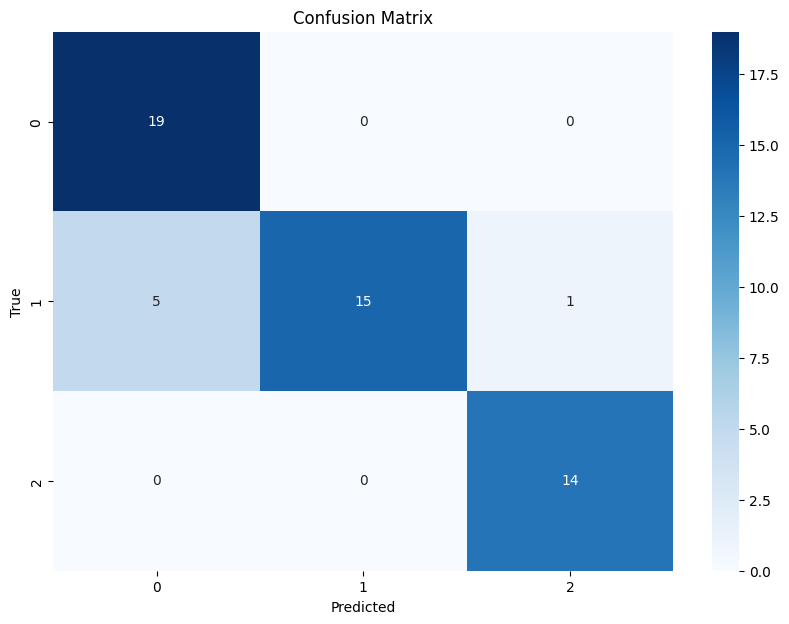

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import layers
from keras.utils import to_categorical

# Load data
file_name = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
X = pd.read_csv(file_name, sep=",", header=None)

# Separate target and features
target = np.asarray(X[0]) - 1  # Adjust target indices to start from 0
data = np.asarray(X.drop(0, axis=1))

# Determine the number of unique classes
num_classes = len(np.unique(target))

# Split data
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

# Scale features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to categorical
train_labels = to_categorical(y_train, num_classes=num_classes)
test_labels = to_categorical(y_test, num_classes=num_classes)

# Create the network
network = Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(13,)))
network.add(layers.Dense(num_classes, activation='softmax'))  # Match the number of output neurons to the number of classes
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the network
network.fit(X_train, train_labels, epochs=20, batch_size=40)

# Evaluate the network
test_loss, test_acc = network.evaluate(X_test, test_labels)
print('Test Accuracy:', test_acc, '\nTest Loss:', test_loss)

# Predict and prepare for confusion matrix
y_pred_prob = network.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Correct way to extract predicted class labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Visualizing the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=np.unique(target), yticklabels=np.unique(target))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
